# Placed Ball Analysis

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tkinter as tk
from tkinter import simpledialog
import matplotlib as mpl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [45]:
import json
from pandas.io.json import json_normalize
import seaborn as sns
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
from matplotlib.patches import Arc
from sklearn import metrics

from functools import reduce

In [46]:
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 400)

In [47]:
folder_path = '~/Documents/GAA Analytics/2023/'

In [48]:
df = pd.read_excel(folder_path + "Football_Championship_2023_xPoint.xlsx")

In [49]:
df.head()

,Unnamed: 0.1,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,Angle,xP_Knn
0,0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,Pat Spillane,13,forward,right,n,41.83,36.958727,63.599366,108.041273,24.400634,1,1,0,3,0,27.937192,0,0.455616,-152.062808,0.4
1,1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,Sean Carrabine,11,forward,left,n,34.85,14.972200,75.464773,130.027800,12.535227,1,0,0,3,1,64.553022,1,0.783316,-115.446978,0.5
2,2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,Dylan McHugh,5,back,hand,n,15.03,136.421588,56.338445,136.421588,56.338445,1,1,0,1,2,-55.190701,0,0.779633,124.809299,0.9
3,3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,Darragh Cummins,18,forward,right,n,39.95,37.656712,30.659578,107.343288,57.340422,1,0,0,3,0,-19.507410,0,0.500563,160.492590,0.5
4,4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,Ian burke,13,forward,left,y,30.77,130.314219,71.037382,130.314219,71.037382,1,1,1,3,1,-61.490704,0,0.488032,118.509296,0.2


### Add placed ball column

In [50]:
df['Placed_Ball'] = np.where((df['Action'] == 'point') | (df['Action'] == 'blocked')
                             | (df['Action'] == 'post') | (df['Action'] == 'short')
                             | (df['Action'] == 'wide'), 0, 1)


In [51]:
df.head()

,Unnamed: 0.1,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,Angle,xP_Knn
0,0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,Pat Spillane,13,forward,right,n,41.83,36.958727,63.599366,108.041273,24.400634,1,1,0,3,0,27.937192,0,0.455616,-152.062808,0.4
1,1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,Sean Carrabine,11,forward,left,n,34.85,14.972200,75.464773,130.027800,12.535227,1,0,0,3,1,64.553022,1,0.783316,-115.446978,0.5
2,2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,Dylan McHugh,5,back,hand,n,15.03,136.421588,56.338445,136.421588,56.338445,1,1,0,1,2,-55.190701,0,0.779633,124.809299,0.9
3,3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,Darragh Cummins,18,forward,right,n,39.95,37.656712,30.659578,107.343288,57.340422,1,0,0,3,0,-19.507410,0,0.500563,160.492590,0.5
4,4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,Ian burke,13,forward,left,y,30.77,130.314219,71.037382,130.314219,71.037382,1,1,1,3,1,-61.490704,0,0.488032,118.509296,0.2


### Predict xP if shots were taken from areas of Placed Balls

In [52]:
df1 = df.copy()

In [53]:
from sklearn.linear_model import LinearRegression

# Step 1: Filter shots taken from placed balls
free_shots = df1[df1['Placed_Ball'] == 1]

# Step 2: Train a linear regression model
play_shots = df1[df1['Placed_Ball'] == 0]

# Assuming you have additional features in your dataframe, you can select relevant features for prediction
X_train = play_shots[['Preferred_Side', 'Pressure_Value', 'Position_Value',
       'Foot_Value', 'Shot_Angle', 'Shot_Distance']]  # Features for play shots
y_train = play_shots['Score']  # Target variable for play shots

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Predict xP for free shots using the trained model
X_free = free_shots[['Preferred_Side', 'Pressure_Value', 'Position_Value',
       'Foot_Value', 'Shot_Angle', 'Shot_Distance']]  # Features for free shots
free_shots['Predicted_xP'] = model.predict(X_free)

# Step 4: Update xP values in the dataframe for shots taken by frees
df1.loc[df1['Placed_Ball'] == 1, 'xP_adv1'] = free_shots['Predicted_xP']

/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_21044/1064071712.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_shots['Predicted_xP'] = model.predict(X_free)


In [54]:
df1.head(30)

,Unnamed: 0.1,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,Angle,xP_Knn,xP_adv1
0,0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,Pat Spillane,13,forward,right,n,41.83,36.958727,63.599366,108.041273,24.400634,1,1,0,3,0,27.937192,0,0.455616,-152.062808,0.4,NaN
1,1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,Sean Carrabine,11,forward,left,n,34.85,14.972200,75.464773,130.027800,12.535227,1,0,0,3,1,64.553022,1,0.783316,-115.446978,0.5,0.520457
2,2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,Dylan McHugh,5,back,hand,n,15.03,136.421588,56.338445,136.421588,56.338445,1,1,0,1,2,-55.190701,0,0.779633,124.809299,0.9,NaN
3,3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,Darragh Cummins,18,forward,right,n,39.95,37.656712,30.659578,107.343288,57.340422,1,0,0,3,0,-19.507410,0,0.500563,160.492590,0.5,NaN
4,4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,Ian burke,13,forward,left,y,30.77,130.314219,71.037382,130.314219,71.037382,1,1,1,3,1,-61.490704,0,0.488032,118.509296,0.2,NaN
5,5,6,53,2023-05-07,Connaught Final,Sligo,Galway,1st,11,wide,Miss,Pat Spillane,13,forward,right,y,38.48,29.629885,68.558043,115.370115,19.441957,0,1,1,3,0,39.652850,0,0.355405,-140.347150,0.5,NaN
6,6,7,55,2023-05-07,Connaught Final,Sligo,Galway,1st,13,wide,Miss,Brian Cox,5,back,right,y,38.92,38.180201,51.556863,106.819799,36.443137,0,1,1,1,0,11.195638,0,0.270428,-168.804362,0.7,NaN
7,7,8,54,2023-05-07,Connaught Final,Galway,Sligo,1st,13,point,Score,Cillian McDaid,7,back,hand,y,9.09,142.703452,52.796532,142.703452,52.796532,1,1,1,1,2,-75.368148,0,0.745389,104.631852,0.9,NaN
8,8,9,56,2023-05-07,Connaught Final,Galway,Sligo,1st,16,free,Score,Shane Walshe,15,forward,right,n,37.16,109.025677,53.327819,109.025677,53.327819,1,0,0,3,0,-14.536160,1,0.790534,165.463840,0.6,0.555638
9,9,10,57,2023-05-07,Connaught Final,Galway,Sligo,1st,17,point,Score,Matthew Tierney,10,forward,hand,n,11.99,139.562520,33.316012,139.562520,33.316012,1,1,0,3,2,63.026758,0,0.853983,-116.973242,0.8,NaN


In [55]:
pb = df1[df1['Placed_Ball'] == 1]
pb

,Unnamed: 0.1,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,Angle,xP_Knn,xP_adv1
1,1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,Sean Carrabine,11,forward,left,n,34.85,14.972200,75.464773,130.027800,12.535227,1,0,0,3,1,64.553022,1,0.783316,-115.446978,0.5,0.520457
8,8,9,56,2023-05-07,Connaught Final,Galway,Sligo,1st,16,free,Score,Shane Walshe,15,forward,right,n,37.16,109.025677,53.327819,109.025677,53.327819,1,0,0,3,0,-14.536160,1,0.790534,165.463840,0.6,0.555638
11,11,12,59,2023-05-07,Connaught Final,Sligo,Galway,1st,22,fortyfive,Score,Niall Murphy,15,forward,right,n,48.76,45.334547,26.055092,99.665453,61.944908,1,0,0,3,0,-21.595292,1,0.612725,158.404708,0.4,0.394800
12,12,14,61,2023-05-07,Connaught Final,Galway,Sligo,1st,28,free,Score,Shane Walshe,15,forward,right,n,26.08,130.314219,65.547417,130.314219,65.547417,1,0,0,3,0,-55.723362,1,0.900882,124.276638,0.4,0.730547
20,20,22,69,2023-05-07,Connaught Final,Sligo,Galway,2nd,37,free,Score,Niall Murphy,15,forward,right,n,23.01,124.904835,55.209460,124.904835,55.209460,1,0,0,3,0,-29.153598,1,0.917748,150.846402,0.9,0.762146
28,28,30,77,2023-05-07,Connaught Final,Sligo,Galway,2nd,51,free,Score,Sean Carrabine,11,forward,left,n,30.87,114.784053,37.676992,114.784053,37.676992,1,0,0,3,1,11.819199,1,0.837430,-168.180801,0.7,0.600132
36,36,38,85,2023-05-07,Connaught Final,Galway,Sligo,2nd,60,fortyfive,Score,Matthew Tierney,10,forward,left,n,45.72,45.160051,51.136260,99.839949,36.863740,1,0,0,3,1,8.979715,1,0.627152,-171.020285,0.5,0.391480
41,41,43,91,2023-05-07,Connaught Final,Galway,Sligo,2nd,70,free,Score,Matthew Tierney,10,forward,left,n,25.72,21.428561,58.220086,123.571439,29.779914,1,0,0,3,1,33.568423,1,0.881462,-146.431577,0.9,0.663273
44,44,46,93,2023-05-07,Munster Final,Kerry,Clare,1st,1,free wide,Miss,Sean O'Shea,11,forward,right,n,34.79,111.119632,51.888917,111.119632,51.888917,0,0,0,3,0,-13.107553,1,0.818435,166.892447,0.7,0.588505
48,48,50,97,2023-05-07,Munster Final,Kerry,Clare,1st,5,free,Score,David Clifford,14,forward,left,n,18.57,127.871271,36.835788,127.871271,36.835788,1,0,0,3,1,22.697465,1,0.928084,-157.302535,0.7,0.769169


In [56]:
mean_column1 = pb['xP_adv'].mean()
mean_column2 = pb['xP_adv1'].mean()

# Find the difference between the means
difference2 = mean_column1 - mean_column2

### The difference in xP if the shots from placed balls were taken from play

difference2

0.20325614105307033

### How much do teams rely on Placed Balls

In [57]:
df.head()

,Unnamed: 0.1,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,Angle,xP_Knn
0,0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,Pat Spillane,13,forward,right,n,41.83,36.958727,63.599366,108.041273,24.400634,1,1,0,3,0,27.937192,0,0.455616,-152.062808,0.4
1,1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,Sean Carrabine,11,forward,left,n,34.85,14.972200,75.464773,130.027800,12.535227,1,0,0,3,1,64.553022,1,0.783316,-115.446978,0.5
2,2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,Dylan McHugh,5,back,hand,n,15.03,136.421588,56.338445,136.421588,56.338445,1,1,0,1,2,-55.190701,0,0.779633,124.809299,0.9
3,3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,Darragh Cummins,18,forward,right,n,39.95,37.656712,30.659578,107.343288,57.340422,1,0,0,3,0,-19.507410,0,0.500563,160.492590,0.5
4,4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,Ian burke,13,forward,left,y,30.77,130.314219,71.037382,130.314219,71.037382,1,1,1,3,1,-61.490704,0,0.488032,118.509296,0.2


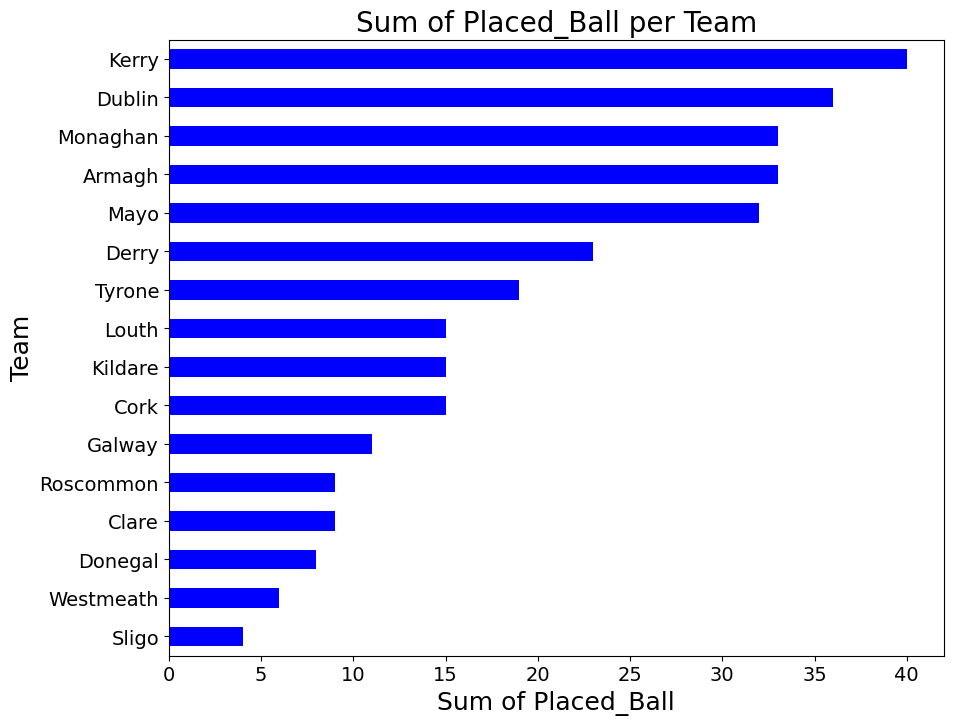

In [58]:


# Group the data by team and calculate the sum of Placed_Ball for each team
team_placed_ball_sum = df.groupby('TeamName')['Placed_Ball'].sum()

# Sort teams based on the sum of Placed_Ball in descending order
team_placed_ball_sum = team_placed_ball_sum.sort_values(ascending=True)

# Plot the sum of Placed_Ball per team as a horizontal bar chart
plt.figure(figsize=(10, 8))
team_placed_ball_sum.plot(kind='barh', color='b')

plt.title('Sum of Placed_Ball per Team', fontsize=20)
plt.xlabel('Sum of Placed_Ball', fontsize=18)
plt.ylabel('Team', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


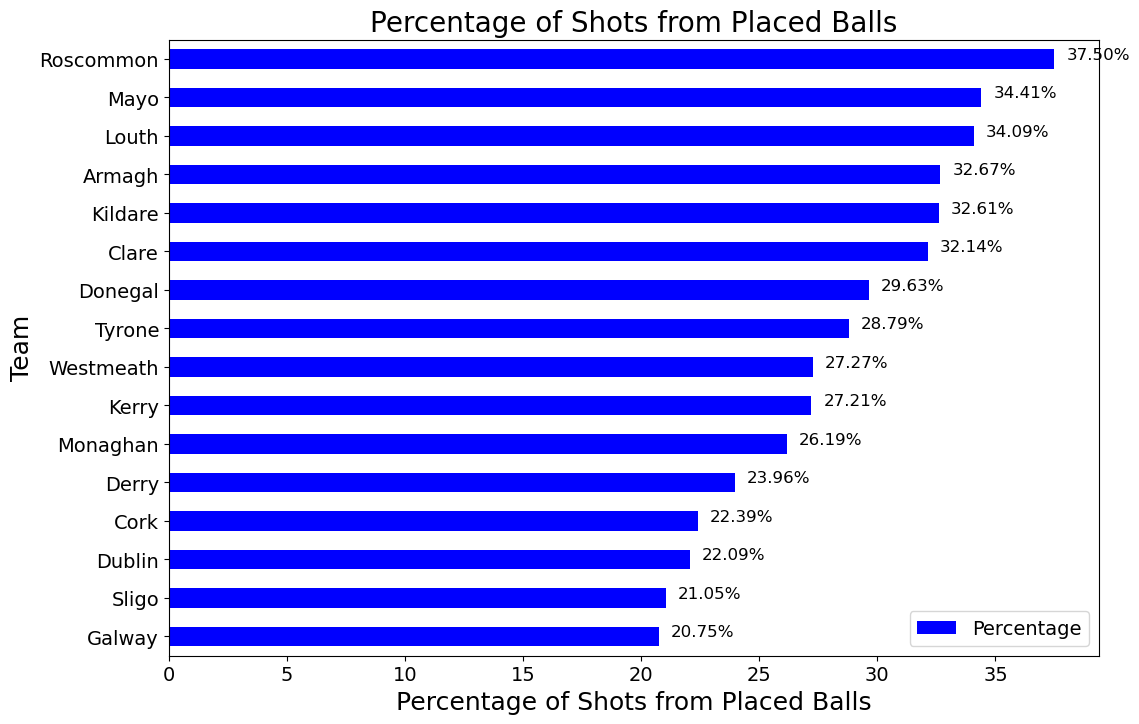

In [59]:

# Group the data by team and calculate the sum of Placed_Ball and total shots for each team
team_placed_ball_sum = df.groupby('TeamName')['Placed_Ball'].sum()
team_total_shots = df.groupby('TeamName').size()

# Calculate the percentage of Placed_Ball over total shots for each team
team_percentage = (team_placed_ball_sum / team_total_shots) * 100

# Sort teams based on the sum of Placed_Ball in descending order
team_percentage = team_percentage.sort_values(ascending=True)

# Plot the sum of Placed_Ball per team as a horizontal bar chart
plt.figure(figsize=(12, 8))

# Plot the horizontal bar chart
bars = team_percentage.plot(kind='barh', color='b')

# Annotate bars with the percentages
for i, v in enumerate(team_percentage):
    plt.text(v + 0.5, i, f'{v:.2f}%', fontsize=12)

# Set labels and title
plt.title('Percentage of Shots from Placed Balls', fontsize=20)
plt.xlabel('Percentage of Shots from Placed Balls', fontsize=18)
plt.ylabel('Team', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Show the legend
plt.legend(["Percentage"], fontsize=14)

plt.show()


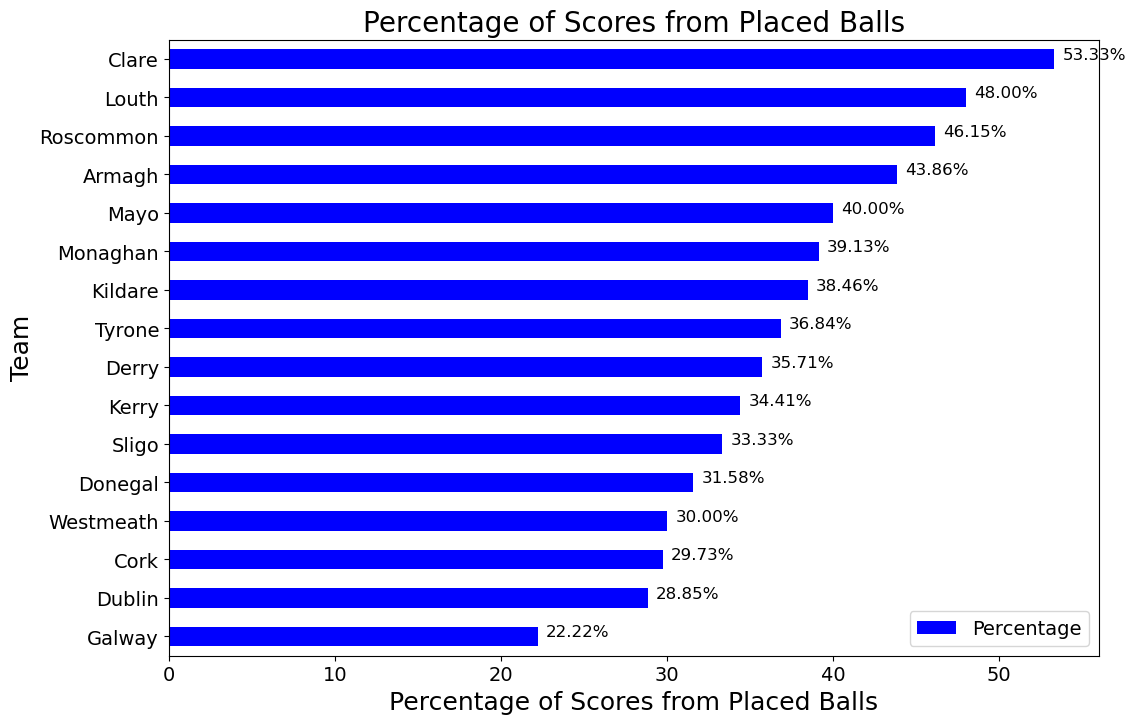

In [60]:
df1 = df[df['Score'] == 1]


# Group the data by team and calculate the sum of Placed_Ball and total shots for each team
team_placed_ball_sum = df1.groupby('TeamName')['Placed_Ball'].sum()
team_total_shots = df1.groupby('TeamName').size()

# Calculate the percentage of Placed_Ball over total shots for each team
team_percentage = (team_placed_ball_sum / team_total_shots) * 100

# Sort teams based on the sum of Placed_Ball in descending order
team_percentage = team_percentage.sort_values(ascending=True)

# Plot the sum of Placed_Ball per team as a horizontal bar chart
plt.figure(figsize=(12, 8))

# Plot the horizontal bar chart
bars = team_percentage.plot(kind='barh', color='b')

# Annotate bars with the percentages
for i, v in enumerate(team_percentage):
    plt.text(v + 0.5, i, f'{v:.2f}%', fontsize=12)

# Set labels and title
plt.title('Percentage of Scores from Placed Balls', fontsize=20)
plt.xlabel('Percentage of Scores from Placed Balls', fontsize=18)
plt.ylabel('Team', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Show the legend
plt.legend(["Percentage"], fontsize=14)

plt.show()

### Offensive mark analysis

In [63]:
df

,Unnamed: 0.1,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,Angle,xP_Knn
0,0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,Pat Spillane,13,forward,right,n,41.83,36.958727,63.599366,108.041273,24.400634,1,1,0,3,0,27.937192,0,0.455616,-152.062808,0.4
1,1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,Sean Carrabine,11,forward,left,n,34.85,14.972200,75.464773,130.027800,12.535227,1,0,0,3,1,64.553022,1,0.783316,-115.446978,0.5
2,2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,Dylan McHugh,5,back,hand,n,15.03,136.421588,56.338445,136.421588,56.338445,1,1,0,1,2,-55.190701,0,0.779633,124.809299,0.9
3,3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,Darragh Cummins,18,forward,right,n,39.95,37.656712,30.659578,107.343288,57.340422,1,0,0,3,0,-19.507410,0,0.500563,160.492590,0.5
4,4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,Ian burke,13,forward,left,y,30.77,130.314219,71.037382,130.314219,71.037382,1,1,1,3,1,-61.490704,0,0.488032,118.509296,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,1119,1194,627,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,short,Miss,Dean Rock,26,forward,right,n,42.10,36.790856,64.456948,108.209144,23.543052,0,1,0,3,0,29.075525,0,0.450275,-150.924475,0.4
1120,1120,1195,628,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,point,Score,Paul Mannion,11,forward,left,y,7.87,5.730524,38.600986,139.269476,49.399014,1,1,1,3,1,-43.293866,0,0.840780,136.706134,0.7
1121,1121,1196,630,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,free,Score,Dean Rock,26,forward,right,n,31.64,26.844570,60.737940,118.155430,27.262060,1,1,0,3,0,31.944078,1,0.846579,-148.055922,0.9
1122,1122,1197,625,2023-07-30,All Ireland Final,Kerry,Dublin,2nd,70,free,Score,Sean O'Shea,11,forward,right,n,17.38,130.320843,53.299923,130.320843,53.299923,1,0,0,3,0,-32.356145,1,0.944841,147.643855,0.8


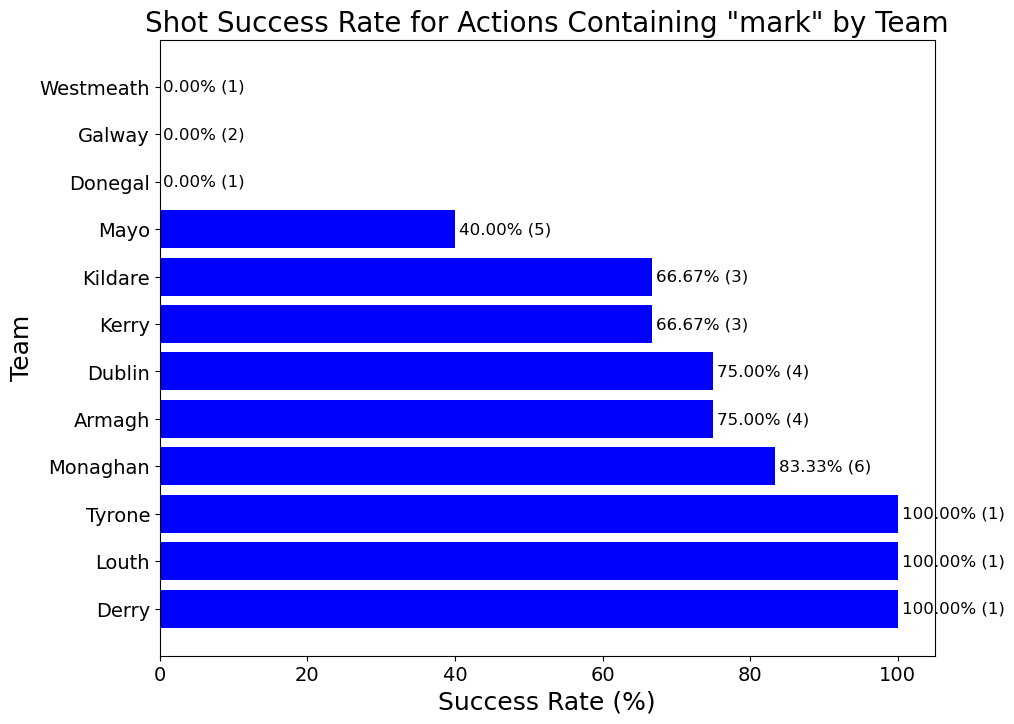

In [66]:


# Filter the DataFrame for rows where Action contains 'mark'
mark_df = df[df['Action'].str.contains('mark', case=False, na=False)]

# Group the filtered DataFrame by team and calculate shot success rate for each team
team_success_rates = mark_df.groupby('TeamName')['Score'].mean() * 100  # Convert to percentage

# Sort teams by success rate in descending order
team_success_rates = team_success_rates.sort_values(ascending=False)

# Plot the shot success rates for each team
plt.figure(figsize=(10, 8))
bars = plt.barh(team_success_rates.index, team_success_rates, color='b')

# Annotate bars with the total count
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, 
             f'{team_success_rates.iloc[i]:.2f}% ({mark_df[mark_df["TeamName"] == team_success_rates.index[i]].shape[0]})',
             va='center', fontsize=12)

# Set labels and title
plt.title('Shot Success Rate for Actions Containing "mark" by Team', fontsize=20)
plt.xlabel('Success Rate (%)', fontsize=18)
plt.ylabel('Team', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


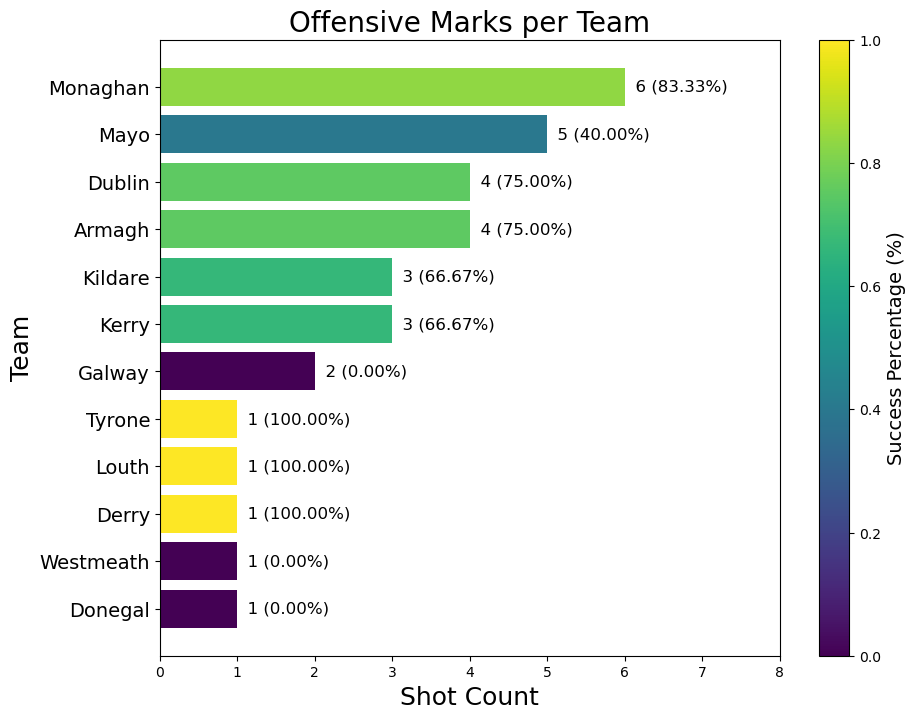

In [76]:


# Filter the DataFrame for rows where Action contains 'mark'
mark_df = df[df['Action'].str.contains('mark', case=False, na=False)]

# Group the filtered DataFrame by team and calculate shot success rate for each team
team_success_rates = mark_df.groupby('TeamName')['Score'].mean() * 100  # Convert to percentage

# Get the count of shots for each team
team_shot_counts = mark_df['TeamName'].value_counts()

# Combine count and percentage into a DataFrame
team_data = pd.DataFrame({'Shot Count': team_shot_counts, 'Success Percentage': team_success_rates})

# Sort teams first by count (in descending order) and then by percentage (in descending order)
sorted_teams = team_data.sort_values(by=['Shot Count', 'Success Percentage'], ascending=[True, True]).index.tolist()

# Plot the count of shots for each team and color the bars based on success percentage
plt.figure(figsize=(10, 8))
bars = plt.barh(np.arange(len(sorted_teams)), team_data.loc[sorted_teams, 'Shot Count'], color=plt.cm.viridis(team_data.loc[sorted_teams, 'Success Percentage'] / 100))

# Annotate bars with labels showing count and percentage
for i, bar in enumerate(bars):
    count = team_data.loc[sorted_teams[i], 'Shot Count']
    percentage = team_data.loc[sorted_teams[i], 'Success Percentage']
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'  {count} ({percentage:.2f}%)', ha='left', va='center', fontsize=12)

# Add labels and title
plt.title('Offensive Marks per Team', fontsize=20)
plt.xlabel('Shot Count', fontsize=18)
plt.ylabel('Team', fontsize=18)
plt.yticks(np.arange(len(sorted_teams)), sorted_teams, fontsize=14)

# Set the x-axis limits from 0 to 8
plt.xlim(0, 8)

# Add a color bar to indicate success percentage
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=plt.gca())
cbar.set_label('Success Percentage (%)', fontsize=14)

plt.show()


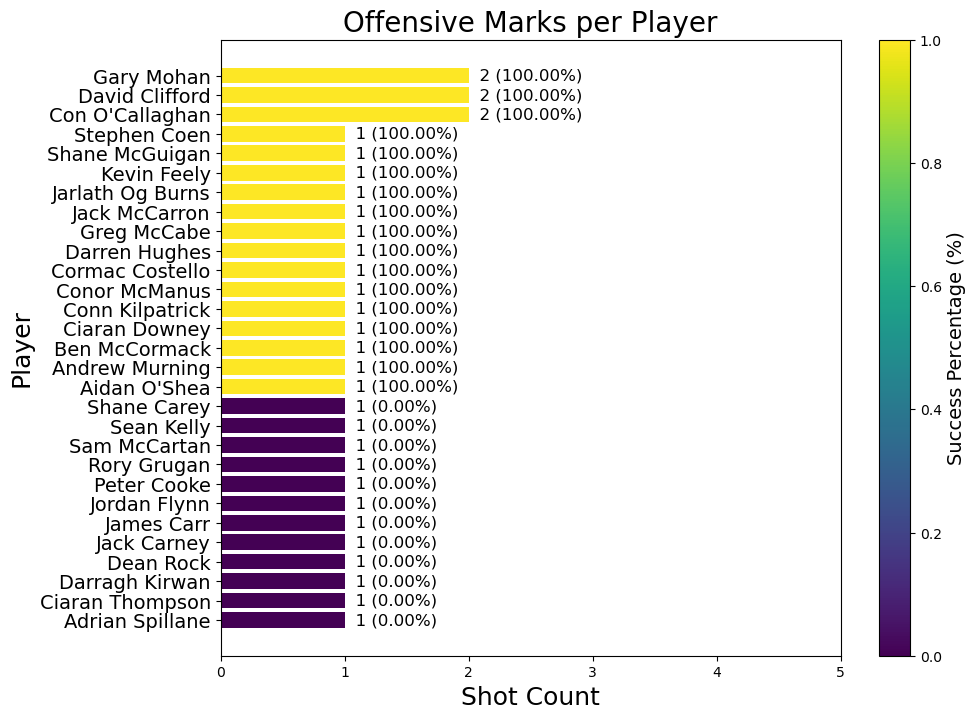

In [80]:


# Filter the DataFrame for rows where Action contains 'mark'
mark_df = df[df['Action'].str.contains('mark', case=False, na=False)]

# Group the filtered DataFrame by Player and calculate shot success rate for each Player
Player_success_rates = mark_df.groupby('PlayerName')['Score'].mean() * 100  # Convert to percentage

# Get the count of shots for each Player
Player_shot_counts = mark_df['PlayerName'].value_counts()

# Combine count and percentage into a DataFrame
Player_data = pd.DataFrame({'Shot Count': Player_shot_counts, 'Success Percentage': Player_success_rates})

# Sort Players first by count (in descending order) and then by percentage (in descending order)
sorted_Players = Player_data.sort_values(by=['Shot Count', 'Success Percentage'], ascending=[True, True]).index.tolist()

# Plot the count of shots for each Player and color the bars based on success percentage
plt.figure(figsize=(10, 8))
bars = plt.barh(np.arange(len(sorted_Players)), Player_data.loc[sorted_Players, 'Shot Count'], color=plt.cm.viridis(Player_data.loc[sorted_Players, 'Success Percentage'] / 100))

# Annotate bars with labels showing count and percentage
for i, bar in enumerate(bars):
    count = Player_data.loc[sorted_Players[i], 'Shot Count']
    percentage = Player_data.loc[sorted_Players[i], 'Success Percentage']
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'  {count} ({percentage:.2f}%)', ha='left', va='center', fontsize=12)

# Add labels and title
plt.title('Offensive Marks per Player', fontsize=20)
plt.xlabel('Shot Count', fontsize=18)
plt.ylabel('Player', fontsize=18)
plt.yticks(np.arange(len(sorted_Players)), sorted_Players, fontsize=14)

# Set the x-axis limits from 0 to 8
plt.xlim(0, 5)

# Add a color bar to indicate success percentage
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=plt.gca())
cbar.set_label('Success Percentage (%)', fontsize=14)

plt.show()
